<a href="https://colab.research.google.com/github/Amritha07dec/MCN/blob/sample_generation/ode_multiple_sample_generation_code_looped.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Everyting updated to generate 31 samples


In [ ]:

#!wget -O script.py "https://raw.githubusercontent.com/mjayadharan/MCN/refs/heads/main/ode_models_dictionary.py"
#!python script.py  # If you want to execute the script directly


In [1]:
!git clone https://github.com/Amritha07dec/MCN.git

Cloning into 'MCN'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 23 (delta 4), reused 15 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (23/23), 322.84 KiB | 8.28 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [2]:
%cd MCN

/content/MCN


In [3]:
!ls

backup	ode_models_dictionary.py  ODE_simulator_template.ipynb	README.md


In [ ]:

!git checkout -b samplegen

Switched to a new branch 'samplegen'


In [ ]:
!chmod -R u+w .


In [ ]:
import numpy as np

"""
Dictionary Structure:
----------------------
This dictionary contains entries for various dynamical systems. Each key in the dictionary corresponds to the name of a
 system (e.g., 'Lorenz', 'Van_der_Pol', 'Rössler').

Each system entry is a dictionary with the following structure:

- DCF_values:  A list of DCF values where the first entry represents the type of functions that appear on the
    right-hand side, for example, 'Poly' for polynomials, 'Rat' for rational functions, etc. The second entry represents
    the highest degree of terms appearing on the RHS; for example, for polynomials, a value of 2 means a second-degree
     polynomial. The third entry represents the number of hidden states.

- rhs_function: A lambda function that computes the right-hand side of the ordinary differential equation (ODE) system.
  It takes the following arguments:
    - t (float): The time variable.
    - y (list): The state variables of the system.
    - params (list): The parameters of the system.

- parameters: A list of tuples, where each tuple contains:
    - A list of parameters (list): The parameters for the system.
    - A list of initial conditions (list): The initial conditions for the system.
    - A string description (str): A description of the behavior corresponding to  the corresponding pair of parameters,
      and initial conditions. This description can be one of the following:
        - 'chaotic': The system exhibits chaotic behavior.
        - 'cyclic': The system exhibits cyclic behavior.
        - 'fixed point': The system converges to a fixed point.
        - 'NA': The behavior is unknown.
"""


ode_systems = {
    # """
    #
    # Linear systems
    # ------------------
    #
    # """
     'Damped_Oscilllator': {
        'DCF_values': ['Poly', 1, 0],
        'rhs_function': lambda t, y, params: [
            y[1], #dx/dt=y
            -params[0]*y[1]-params[1]**2*y[0]],    #dy/dt=-2*y*gamma-omega_theta^2*x  -params[0]*y[1]*params[1]-params[2]**2*y[0]],
        'parameters_and_IC': [
            ([1.0, 0.5], [4.0, 3.0], 'Underdamped'),       # Underdamped Oscillator (partial decay, oscillations persist)
            ([1.0, 1.0], [1.0, 0.0], 'Critically Damped'),  # Critically Damped Oscillator (fastest return to equilibrium)
            ([1.0, 2.0], [5.0, 8.0], 'Overdamped')          # Overdamped Oscillator (slow, no oscillation)
        ]
    },
    'Linear_1D': {
        'DCF_values': ['Poly', 1, 0],
        'rhs_function': lambda t, y, params: [params[0] * y[0]],  # Single state: dx/dt = a * x (no cyclic behavior)
        'parameters_and_IC': [
            ([0.5], [1.0], 'growth'),  # Exponential growth
            ([-0.5], [1.0], 'decay'),  # Exponential decay
        ]
    },
    'Linear_2D_Harmonic_Oscillator': {
        'DCF_values': ['Poly', 1, 0],
        'rhs_function': lambda t, y, params: [
            y[1],  # dx/dt = y
            -params[0] * y[0]  # dy/dt = -omega^2 * x
        ],
        'parameters_and_IC': [
            ([1.0], [1.0, 0.0], 'cyclic (simple harmonic oscillator)'),  # Cyclic behavior (ω = 1)
            ([0.25], [1.0, 0.0], 'cyclic (slower oscillation)'),  # Slower cyclic behavior (ω = 0.5)
        ]
    },
    'Linear_3D_Coupled_Oscillators': {
        'DCF_values': ['Poly', 1, 0],
        'rhs_function': lambda t, y, params: [
            params[0] * y[1],  # dx1/dt = a * x2
            params[1] * y[2],  # dx2/dt = b * x3
            -params[2] * y[0]  # dx3/dt = -c * x1
        ],
        'parameters_and_IC': [
            ([1.0, 1.0, 1.0], [1.0, 0.0, 0.0], 'cyclic'),  # Cyclic with clear oscillations
            ([0.5, 0.5, 0.5], [1.0, 1.0, 1.0], 'slower cyclic')  # Slower oscillatory behavior
        ]
    },
    'Linear_4D_Coupled_Oscillators': {
        'DCF_values': ['Poly', 1, 0],
        'rhs_function': lambda t, y, params: [
            params[0] * y[1],  # dx1/dt = a * x2
            params[1] * y[2],  # dx2/dt = b * x3
            params[2] * y[3],  # dx3/dt = c * x4
            -params[3] * y[0]  # dx4/dt = -d * x1
        ],
        'parameters_and_IC': [
            ([1.0, 1.0, 1.0, 1.0], [1.0, 0.0, 0.0, 0.0], 'cyclic'),  # Cyclic behavior with balanced coupling
            ([0., 0.5, 0.5, 0.5], [1.0, 0.0, 0.0, 0.0], 'slower cyclic')  # Slower cyclic behavior
        ]
    },
    'Linear_5D_Coupled_Oscillators': {
        'DCF_values': ['Poly', 1, 0],
        'rhs_function': lambda t, y, params: [
            params[0] * y[1],  # dx1/dt = a * x2
            params[1] * y[2],  # dx2/dt = b * x3
            params[2] * y[3],  # dx3/dt = c * x4
            params[3] * y[4],  # dx4/dt = d * x5
            -params[4] * y[0]  # dx5/dt = -e * x1
        ],
        'parameters_and_IC': [
            ([1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 0.0, 0.0, 0.0, 0.0], 'cyclic'),  # Cyclic with clear oscillations
            ([0.5, 0.5, 0.5, 0.5, 0.5], [1.0, 110.0, 110.0, 10.0, -20.0], 'slower cyclic')  # Slower cyclic behavior
        ]
    },
    # """
    #
    # Non-linear systems
    # ------------------
    #
    # """

    'Lorenz': {
        'DCF_values': ['Poly', 2, 0],
        'rhs_function': lambda t, y, params: [
            params[0] * (y[1] - y[0]),                  # dx/dt = sigma * (y - x)
            y[0] * (params[1] - y[2]) - y[1],           # dy/dt = x * (rho - z) - y
            y[0] * y[1] - params[2] * y[2]              # dz/dt = x * y - beta * z
        ],
        'parameters_and_IC': [
            ([10.0, 28.0, 8.0 / 3.0], [1.0, 1.0, 1.0], 'chaotic'),     # Chaotic behavior
            ([10.0, 15.0, 8.0 / 3.0], [0.5, 0.5, 0.5], 'fixed_point'),      # fixed_point
            ([10.0, 100.0, 8.0 / 3.0], [2.0, 2.0, 2.0], 'chaotic')     # Chaotic with different initial conditions
        ]
    },
    'Van_der_Pol': {
        'DCF_values': ['Poly', 3, 0],
        'rhs_function': lambda t, y, params: [
            y[1],                                       # dx/dt = y
            params[0] * (1 - y[0]**2) * y[1] - y[0]     # dy/dt = mu * (1 - x^2) * y - x
        ],
        'parameters_and_IC': [
            ([0.5], [1.0, 0.0], 'cyclic'),              # Cyclic for small mu
            ([1.0], [0.0, 1.0], 'cyclic'),              # Moderate mu, cyclic
            ([10.0], [2.0, 0.0], 'cyclic'),             # Larger mu, slower periodicity
            ([20.0], [0.1, 0.1], 'cyclic')              # Very large mu, still cyclic
        ]
    },
    'Rossler': {
        'DCF_values': ['Poly', 2, 0],
        'rhs_function': lambda t, y, params: [
            -y[1] - y[2],                               # dx/dt = -y - z
            y[0] + params[0] * y[1],                    # dy/dt = x + a * y
            params[1] + y[2] * (y[0] - params[2])       # dz/dt = b + z * (x - c)
        ],
        'parameters_and_IC': [
            ([0.2, 0.2, 5.7], [1.0, 1.0, 1.0], 'chaotic'),  # Classic chaotic behavior
            ([0.1, 0.1, 6.0], [0.5, 0.5, 0.5], 'cyclic'),  # Cyclic with modified parameters
            ([0.2, 0.2, 10.0], [1.0, 0.0, 0.0], 'chaotic') # Chaotic with higher c
        ]
    },
    'Lorenz96': {
        'DCF_values': ['Poly', 2, 0],
        'rhs_function': lambda t, y, params: [
            (y[(i+1) % params[1]] - y[i-2]) * y[i-1] - y[i] + params[0]
            for i in range(params[1])
        ],  # N-dimensional Lorenz-96 system
        'parameters_and_IC': [
            ([10.0, 4], [0.0, 1.0, 2.0, 3.0], 'cyclic'),               # 4D cyclic system
            ([12.0, 6], [1.0, 0.5, 0.5, 0.5, 1.0, 0.0], 'chaotic')     # 6D chaotic system
        ]
    },
     'Duffing_Oscillator': {
         'DCF_values': ['Poly', 3, 0],
         'rhs_function': lambda t, y, params: [
             y[1],  # dx/dt = y
             -params[0] * y[1] - params[1] * y[0] - params[2] * y[0]**3 + params[3] * np.cos(params[4] * t)  # dy/dt = -delta * y - alpha * x - beta * x^3 + gamma * cos(omega * t)
         ],
         'parameters_and_IC': [
             ([0.2, 1.0, 0.5, 0.3, 1.0], [1.0, 0.0], 'cyclic'),  # Typical cyclic motion
             ([0.2, 1.0, 0.5, 0.8, 1.0], [0.5, 0.0], 'chaotic'),  # Chaotic motion
         ]
     },
    'Quartic_Oscillator': {
        'DCF_values': ['Poly', 4, 0],
        'rhs_function': lambda t, y, params: [
            y[1],  # dx/dt = y
            -params[0] * y[0]**3 - params[1] * y[0]**4  # dy/dt = -x^3 - x^4
        ],
        'parameters_and_IC': [
            ([1.0, 0.5], [1.0, 0.0], 'cyclic'),  # Cyclic motion with quartic interaction
            ([1.0, 1.0], [0.5, 0.0], 'complex'),  # More complex motion due to quartic term
        ]
    },
    'Lotka_Volterra_Cubic': {
        'DCF_values': ['Poly', 3, 0],
        'rhs_function': lambda t, y, params: [
            params[0] * y[0] - params[1] * y[0] * y[1] - params[2] * y[0]**3,  # dx/dt = alpha * x - beta * x * y - gamma * x^3
            -params[3] * y[1] + params[4] * y[0] * y[1]**2  # dy/dt = -delta * y + epsilon * x * y^2
        ],
        'parameters_and_IC': [
            ([1.0, 0.5, 0.1, 1.0, 0.1], [0.5, 1.0], 'cyclic'),  # Cyclic predator-prey dynamics
            ([1.0, 0.5, 0.3, 1.0, 0.2], [0.7, 0.5], 'complex'),  # More complex dynamics due to cubic interaction
        ]
    }
}

In [ ]:
#import ode_models_dictionary
#!python ode_models_dictionary.py

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import yaml

from scipy.integrate import solve_ivp

In [ ]:
def simulate_ode_system(rhs_func, t_span, y0, params, solver='RK45', t_eval=None):
    """
    Simulate the ODE system.

    Parameters:
    - rhs_func: The right-hand side of the ODE as a function of (t, y, params).
    - t_span: Tuple (t_0, t_final), the time span for the simulation.
    - y0: Initial conditions as an array.
    - params: Parameters required by the rhs_func.
    - solver: The ODE solver method ('RK45', 'RK23', 'DOP853', 'LSODA', etc.).
    - t_eval: Array of time points at which to store the solution.

    Returns:
    - sol: Solution object containing times and states.
    """
    # Define the ODE system as a lambda function to pass the parameters
    def ode_func(t, y):
        return rhs_func(t, y, params)

    # Solve the ODE system
    sol = solve_ivp(ode_func, t_span, y0, method=solver, t_eval=t_eval)

    return sol


# Updated phase space plot function
def plot_phase_space(sol, state_indices=(0, 1, 2)):
    """
    Plots the phase space of the solution. Automatically switches to 3D if there are more than two states.

    Args:
    sol: Solution object from the ODE solver (such as the one returned by scipy's solve_ivp).
    state_indices: Tuple specifying which state variables to plot (default is (0, 1)).
                   For a 3D plot, pass 3 indices, for example (0, 1, 2).
    """
    y = sol.y
    num_states = y.shape[0]

    # 2D phase space
    if num_states == 2 or len(state_indices) ==2:
        plt.figure(figsize=(8, 6))
        plt.plot(y[state_indices[0]], y[state_indices[1]], lw=0.8)
        plt.xlabel(f"State {state_indices[0]}")
        plt.ylabel(f"State {state_indices[1]}")
        plt.title("2D Phase Space")
        plt.grid(True)
        plt.show()

    # 3D phase space if the system has more than two states
    elif len(state_indices) == 3 and num_states >= 3:
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot(y[state_indices[0]], y[state_indices[1]], y[state_indices[2]], lw=0.8)
        ax.set_xlabel(f"State {state_indices[0]}")
        ax.set_ylabel(f"State {state_indices[1]}")
        ax.set_zlabel(f"State {state_indices[2]}")
        ax.set_title("3D Phase Space")
        plt.show()

    else:
        print("State indices must be 2 or 3 for phase space plotting.")
def plot_trajectories(sol):
    """
    Plot the trajectories of all state variables over time.

    Parameters:
    - sol: Solution object from solve_ivp.
    """
    plt.figure(figsize=(8, 6))
    for i in range(sol.y.shape[0]):
        plt.plot(sol.t, sol.y[i], label=f'State {i}')
    plt.xlabel('Time')
    plt.ylabel('State Variables')
    plt.title('State Variables Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
# importing models dictionary
#from ode_models_dictionary import ode_systems


Simulating Damped_Oscilllator (Set 1)
Parameters: [1.0, 0.5]
Initial conditions: [4.0, 3.0]
Expected behavior: Underdamped


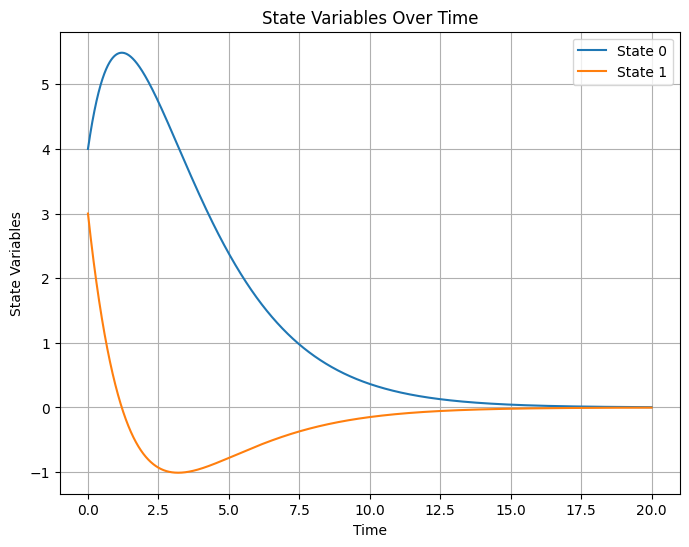

Pickle file saved at: pickle_files/Damped_Oscilllator_Set-1_Deg-Poly_1_0_Params-1.0_0.5_IC-4.0_3.0.pkl

Simulating Damped_Oscilllator (Set 2)
Parameters: [1.0, 1.0]
Initial conditions: [1.0, 0.0]
Expected behavior: Critically Damped


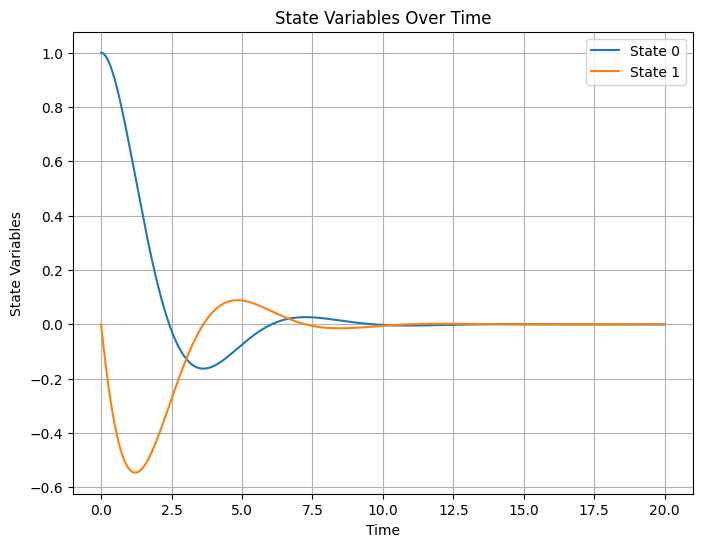

Pickle file saved at: pickle_files/Damped_Oscilllator_Set-2_Deg-Poly_1_0_Params-1.0_1.0_IC-1.0_0.0.pkl

Simulating Damped_Oscilllator (Set 3)
Parameters: [1.0, 2.0]
Initial conditions: [5.0, 8.0]
Expected behavior: Overdamped


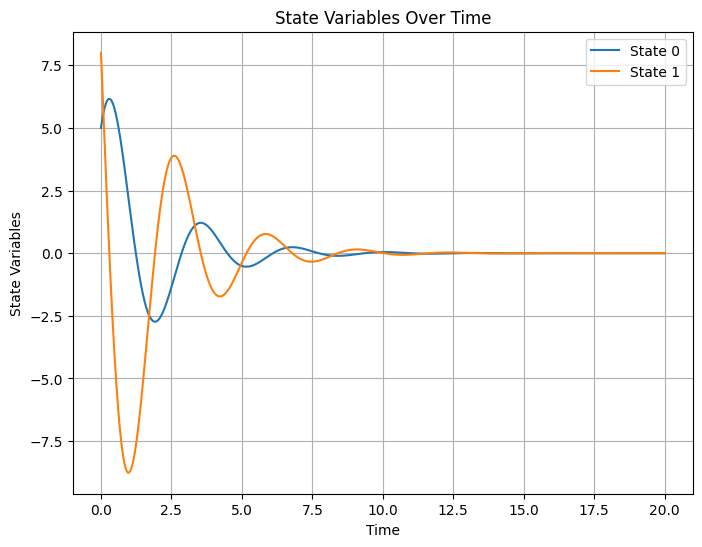

Pickle file saved at: pickle_files/Damped_Oscilllator_Set-3_Deg-Poly_1_0_Params-1.0_2.0_IC-5.0_8.0.pkl

Simulating Linear_1D (Set 1)
Parameters: [0.5]
Initial conditions: [1.0]
Expected behavior: growth


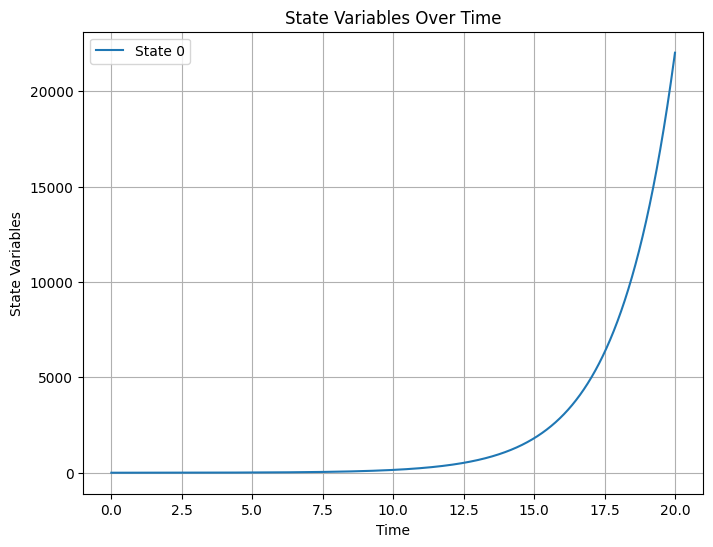

Pickle file saved at: pickle_files/Linear_1D_Set-1_Deg-Poly_1_0_Params-0.5_IC-1.0.pkl

Simulating Linear_1D (Set 2)
Parameters: [-0.5]
Initial conditions: [1.0]
Expected behavior: decay


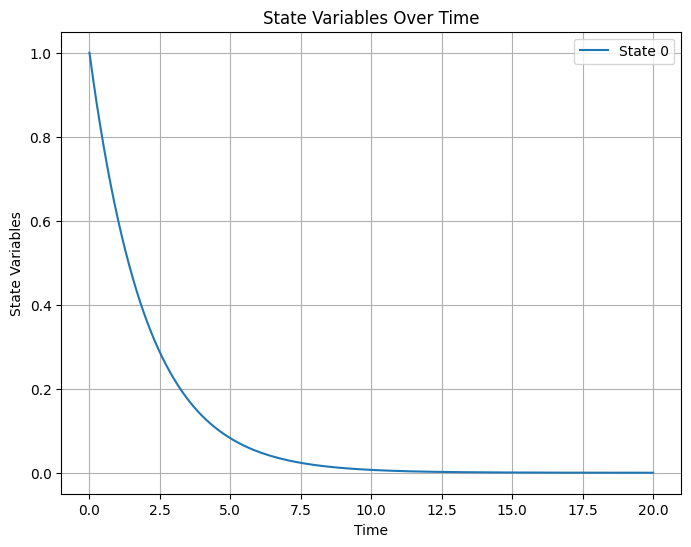

Pickle file saved at: pickle_files/Linear_1D_Set-2_Deg-Poly_1_0_Params--0.5_IC-1.0.pkl

Simulating Linear_2D_Harmonic_Oscillator (Set 1)
Parameters: [1.0]
Initial conditions: [1.0, 0.0]
Expected behavior: cyclic (simple harmonic oscillator)


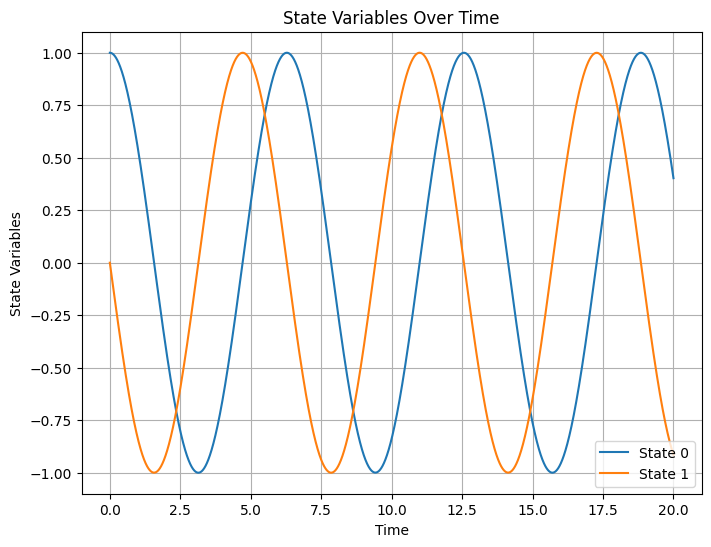

Pickle file saved at: pickle_files/Linear_2D_Harmonic_Oscillator_Set-1_Deg-Poly_1_0_Params-1.0_IC-1.0_0.0.pkl

Simulating Linear_2D_Harmonic_Oscillator (Set 2)
Parameters: [0.25]
Initial conditions: [1.0, 0.0]
Expected behavior: cyclic (slower oscillation)


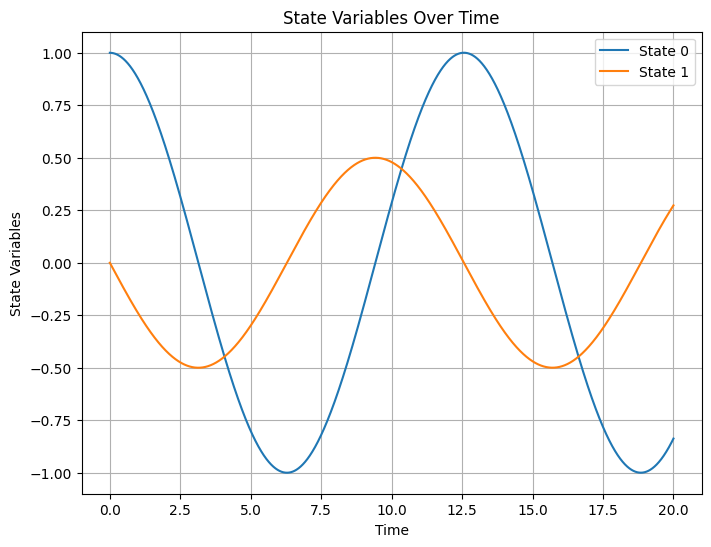

Pickle file saved at: pickle_files/Linear_2D_Harmonic_Oscillator_Set-2_Deg-Poly_1_0_Params-0.25_IC-1.0_0.0.pkl

Simulating Linear_3D_Coupled_Oscillators (Set 1)
Parameters: [1.0, 1.0, 1.0]
Initial conditions: [1.0, 0.0, 0.0]
Expected behavior: cyclic


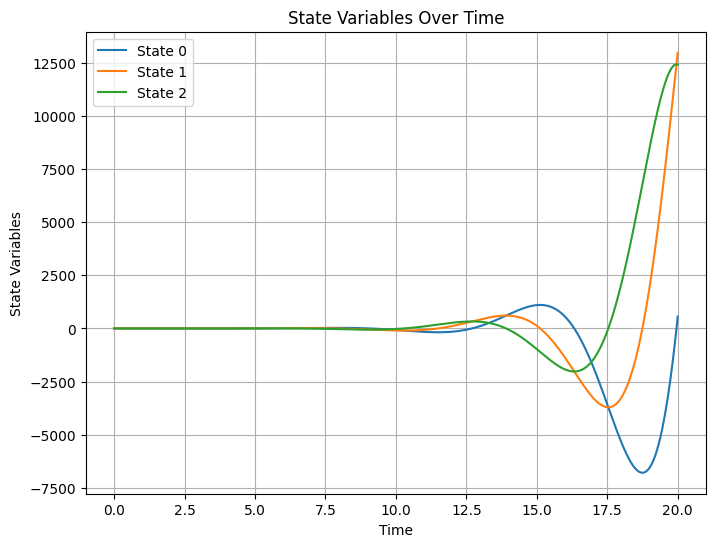

Pickle file saved at: pickle_files/Linear_3D_Coupled_Oscillators_Set-1_Deg-Poly_1_0_Params-1.0_1.0_1.0_IC-1.0_0.0_0.0.pkl

Simulating Linear_3D_Coupled_Oscillators (Set 2)
Parameters: [0.5, 0.5, 0.5]
Initial conditions: [1.0, 1.0, 1.0]
Expected behavior: slower cyclic


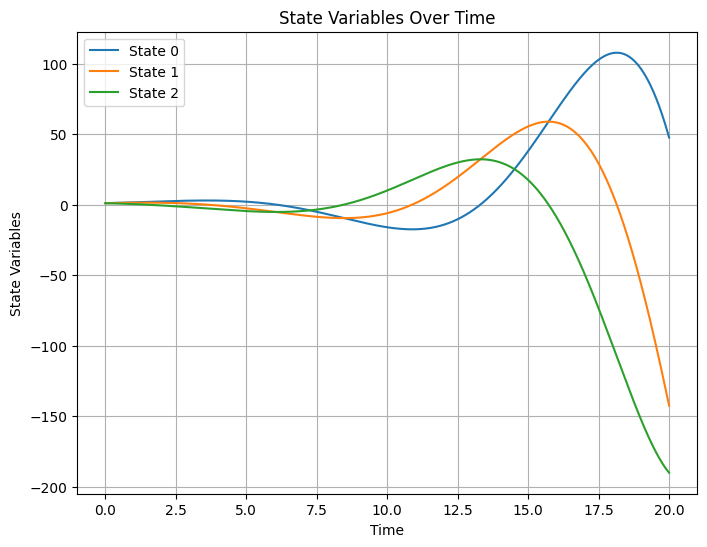

Pickle file saved at: pickle_files/Linear_3D_Coupled_Oscillators_Set-2_Deg-Poly_1_0_Params-0.5_0.5_0.5_IC-1.0_1.0_1.0.pkl

Simulating Linear_4D_Coupled_Oscillators (Set 1)
Parameters: [1.0, 1.0, 1.0, 1.0]
Initial conditions: [1.0, 0.0, 0.0, 0.0]
Expected behavior: cyclic


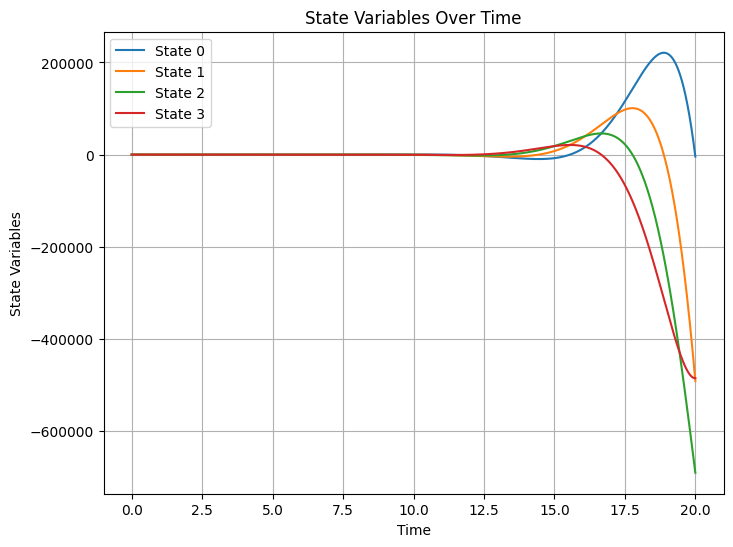

Pickle file saved at: pickle_files/Linear_4D_Coupled_Oscillators_Set-1_Deg-Poly_1_0_Params-1.0_1.0_1.0_1.0_IC-1.0_0.0_0.0_0.0.pkl

Simulating Linear_4D_Coupled_Oscillators (Set 2)
Parameters: [0.0, 0.5, 0.5, 0.5]
Initial conditions: [1.0, 0.0, 0.0, 0.0]
Expected behavior: slower cyclic


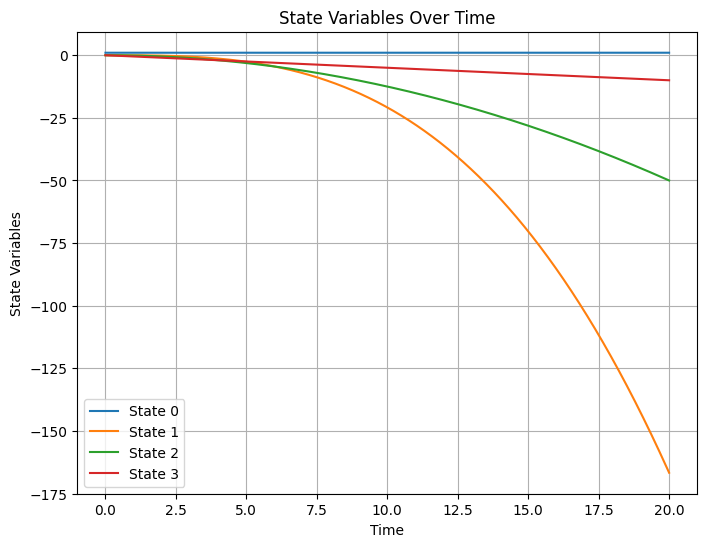

Pickle file saved at: pickle_files/Linear_4D_Coupled_Oscillators_Set-2_Deg-Poly_1_0_Params-0.0_0.5_0.5_0.5_IC-1.0_0.0_0.0_0.0.pkl

Simulating Linear_5D_Coupled_Oscillators (Set 1)
Parameters: [1.0, 1.0, 1.0, 1.0, 1.0]
Initial conditions: [1.0, 0.0, 0.0, 0.0, 0.0]
Expected behavior: cyclic


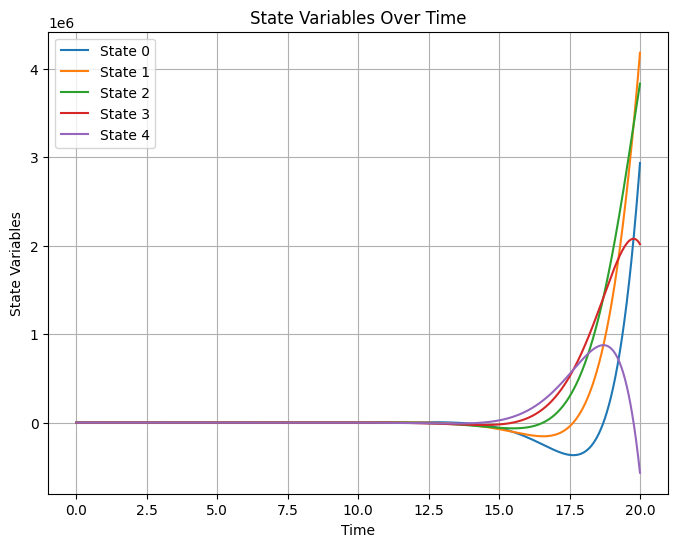

Pickle file saved at: pickle_files/Linear_5D_Coupled_Oscillators_Set-1_Deg-Poly_1_0_Params-1.0_1.0_1.0_1.0_1.0_IC-1.0_0.0_0.0_0.0_0.0.pkl

Simulating Linear_5D_Coupled_Oscillators (Set 2)
Parameters: [0.5, 0.5, 0.5, 0.5, 0.5]
Initial conditions: [1.0, 110.0, 110.0, 10.0, -20.0]
Expected behavior: slower cyclic


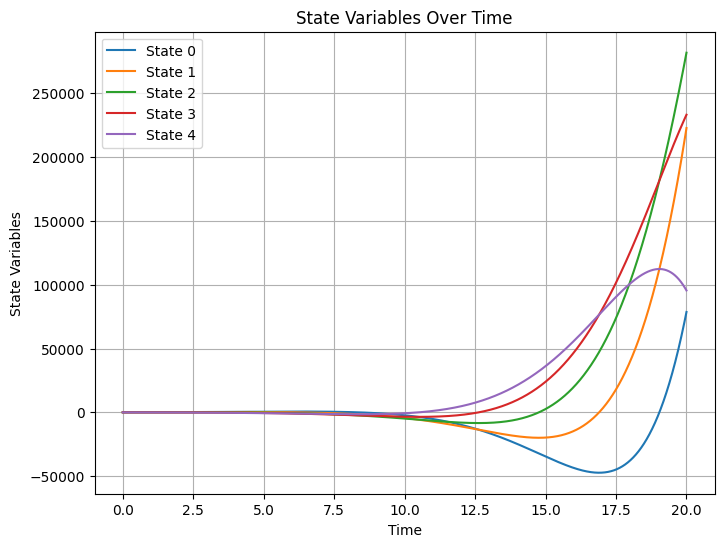

Pickle file saved at: pickle_files/Linear_5D_Coupled_Oscillators_Set-2_Deg-Poly_1_0_Params-0.5_0.5_0.5_0.5_0.5_IC-1.0_110.0_110.0_10.0_-20.0.pkl

Simulating Lorenz (Set 1)
Parameters: [10.0, 28.0, 2.6666666666666665]
Initial conditions: [1.0, 1.0, 1.0]
Expected behavior: chaotic


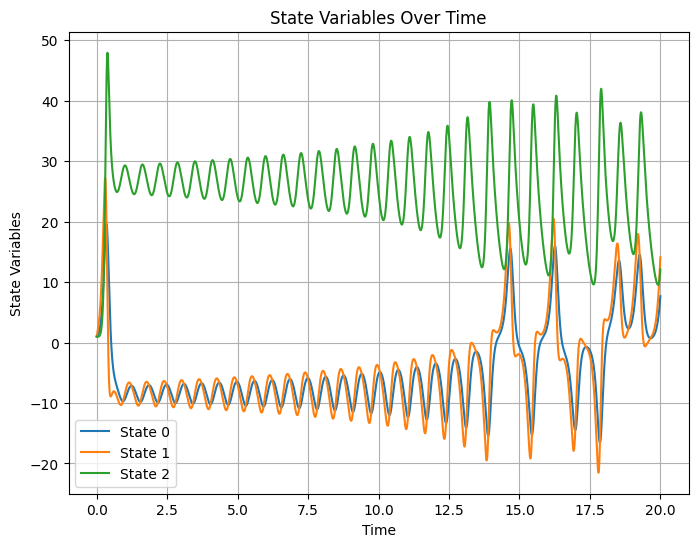

Pickle file saved at: pickle_files/Lorenz_Set-1_Deg-Poly_2_0_Params-10.0_28.0_2.6666666666666665_IC-1.0_1.0_1.0.pkl

Simulating Lorenz (Set 2)
Parameters: [10.0, 15.0, 2.6666666666666665]
Initial conditions: [0.5, 0.5, 0.5]
Expected behavior: fixed_point


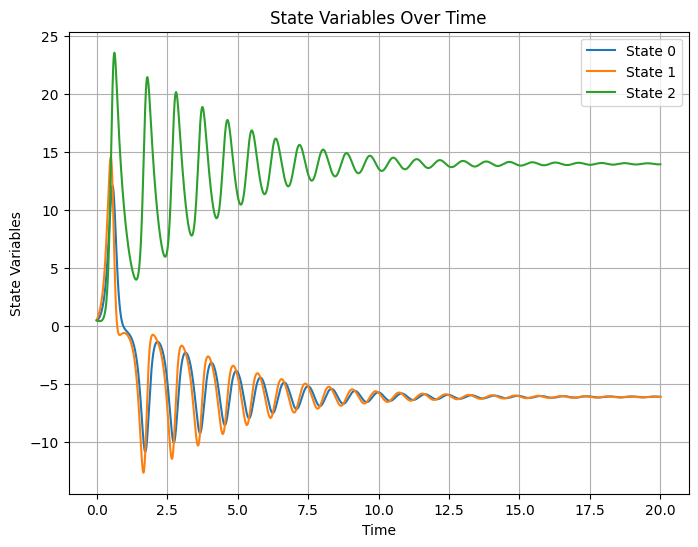

Pickle file saved at: pickle_files/Lorenz_Set-2_Deg-Poly_2_0_Params-10.0_15.0_2.6666666666666665_IC-0.5_0.5_0.5.pkl

Simulating Lorenz (Set 3)
Parameters: [10.0, 100.0, 2.6666666666666665]
Initial conditions: [2.0, 2.0, 2.0]
Expected behavior: chaotic


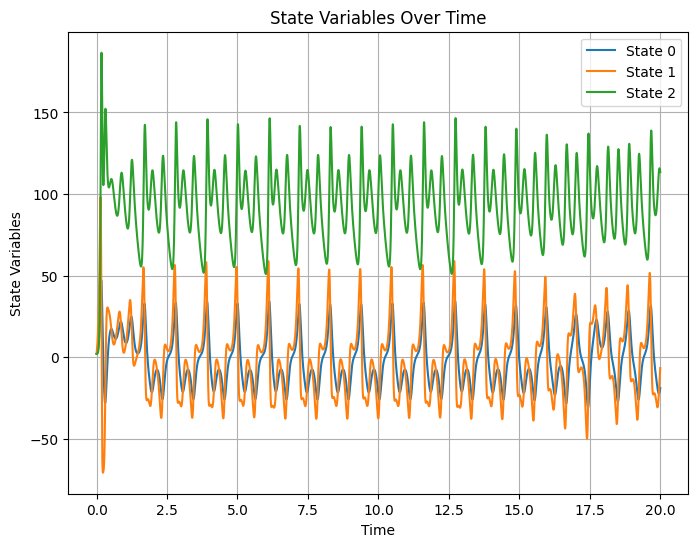

Pickle file saved at: pickle_files/Lorenz_Set-3_Deg-Poly_2_0_Params-10.0_100.0_2.6666666666666665_IC-2.0_2.0_2.0.pkl

Simulating Van_der_Pol (Set 1)
Parameters: [0.5]
Initial conditions: [1.0, 0.0]
Expected behavior: cyclic


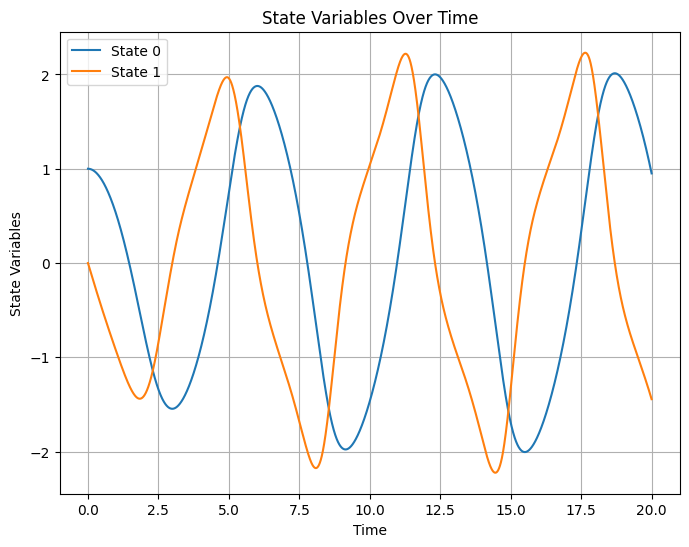

Pickle file saved at: pickle_files/Van_der_Pol_Set-1_Deg-Poly_3_0_Params-0.5_IC-1.0_0.0.pkl

Simulating Van_der_Pol (Set 2)
Parameters: [1.0]
Initial conditions: [0.0, 1.0]
Expected behavior: cyclic


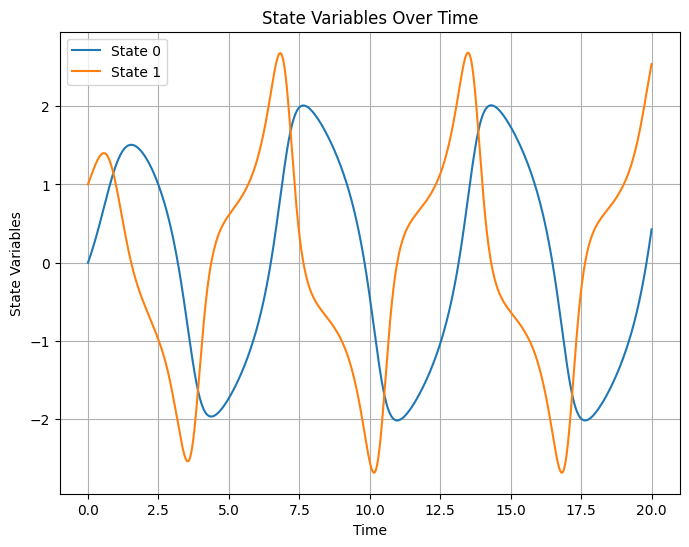

Pickle file saved at: pickle_files/Van_der_Pol_Set-2_Deg-Poly_3_0_Params-1.0_IC-0.0_1.0.pkl

Simulating Van_der_Pol (Set 3)
Parameters: [10.0]
Initial conditions: [2.0, 0.0]
Expected behavior: cyclic


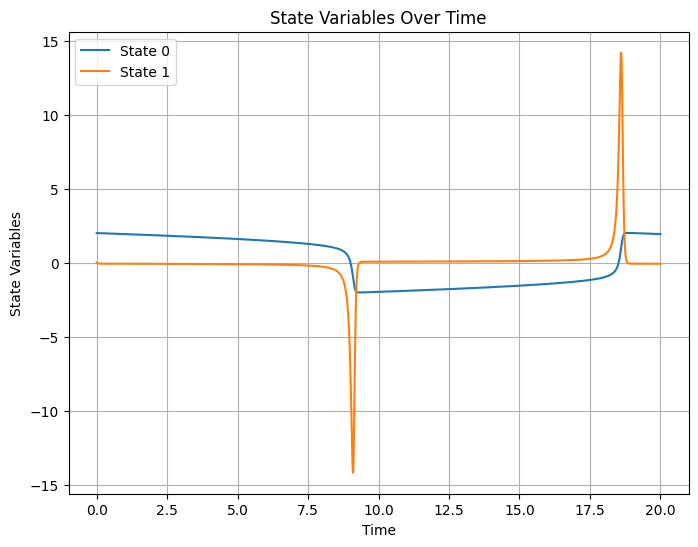

Pickle file saved at: pickle_files/Van_der_Pol_Set-3_Deg-Poly_3_0_Params-10.0_IC-2.0_0.0.pkl

Simulating Van_der_Pol (Set 4)
Parameters: [20.0]
Initial conditions: [0.1, 0.1]
Expected behavior: cyclic


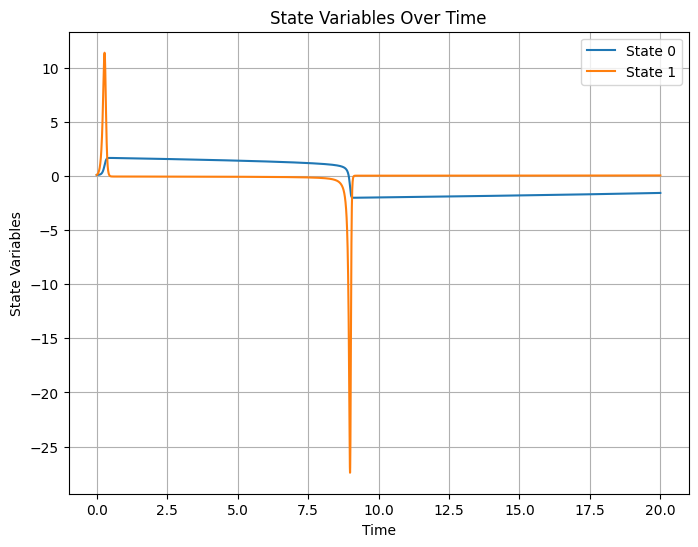

Pickle file saved at: pickle_files/Van_der_Pol_Set-4_Deg-Poly_3_0_Params-20.0_IC-0.1_0.1.pkl

Simulating Rossler (Set 1)
Parameters: [0.2, 0.2, 5.7]
Initial conditions: [1.0, 1.0, 1.0]
Expected behavior: chaotic


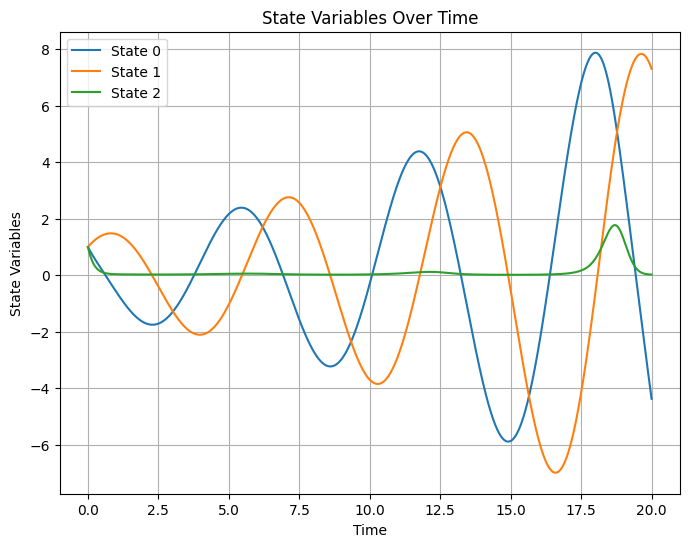

Pickle file saved at: pickle_files/Rossler_Set-1_Deg-Poly_2_0_Params-0.2_0.2_5.7_IC-1.0_1.0_1.0.pkl

Simulating Rossler (Set 2)
Parameters: [0.1, 0.1, 6.0]
Initial conditions: [0.5, 0.5, 0.5]
Expected behavior: cyclic


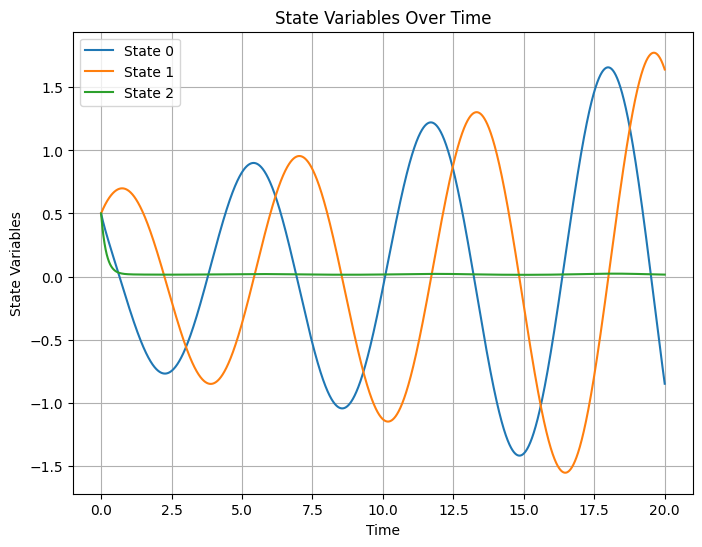

Pickle file saved at: pickle_files/Rossler_Set-2_Deg-Poly_2_0_Params-0.1_0.1_6.0_IC-0.5_0.5_0.5.pkl

Simulating Rossler (Set 3)
Parameters: [0.2, 0.2, 10.0]
Initial conditions: [1.0, 0.0, 0.0]
Expected behavior: chaotic


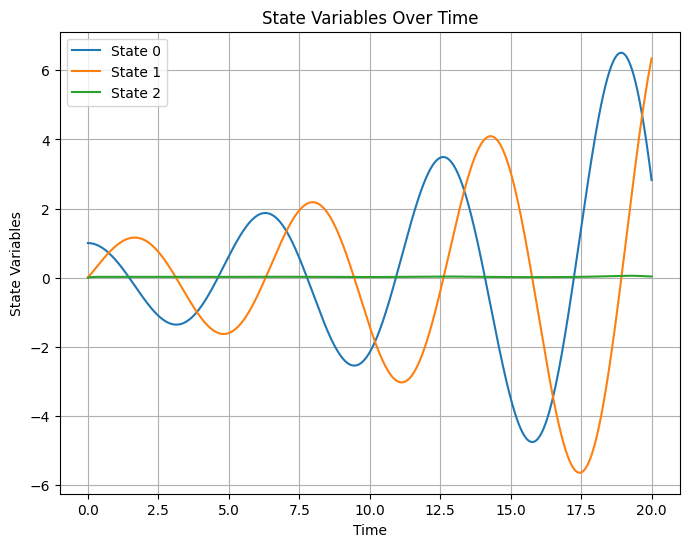

Pickle file saved at: pickle_files/Rossler_Set-3_Deg-Poly_2_0_Params-0.2_0.2_10.0_IC-1.0_0.0_0.0.pkl

Simulating Lorenz96 (Set 1)
Parameters: [10.0, 4]
Initial conditions: [0.0, 1.0, 2.0, 3.0]
Expected behavior: cyclic


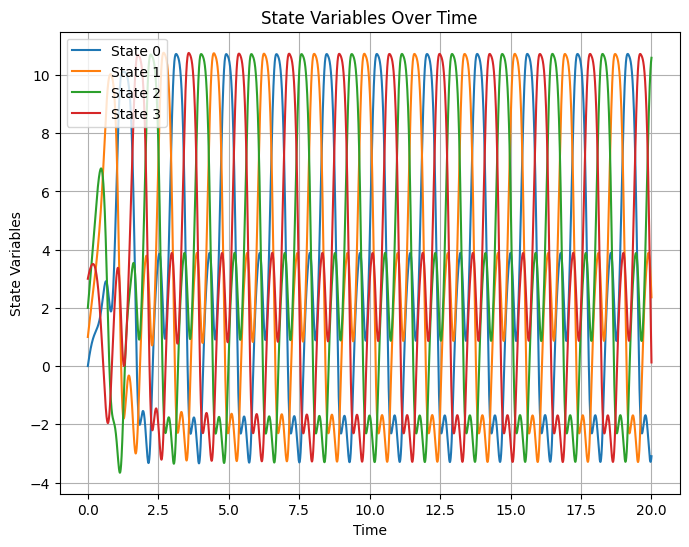

Pickle file saved at: pickle_files/Lorenz96_Set-1_Deg-Poly_2_0_Params-10.0_4_IC-0.0_1.0_2.0_3.0.pkl

Simulating Lorenz96 (Set 2)
Parameters: [12.0, 6]
Initial conditions: [1.0, 0.5, 0.5, 0.5, 1.0, 0.0]
Expected behavior: chaotic


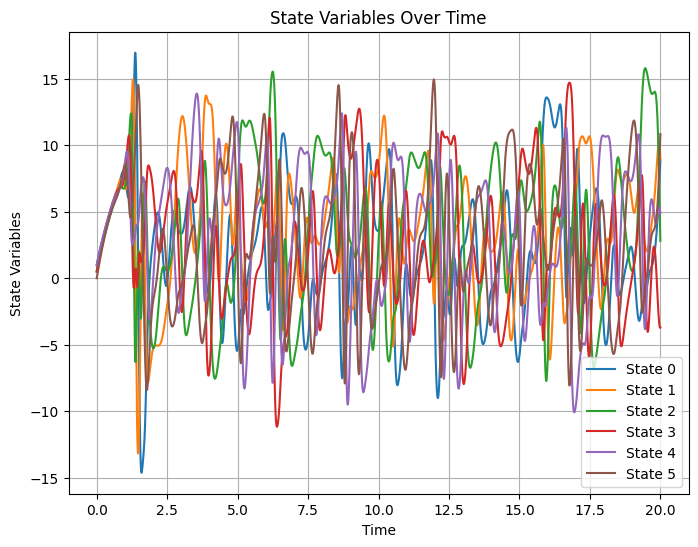

Pickle file saved at: pickle_files/Lorenz96_Set-2_Deg-Poly_2_0_Params-12.0_6_IC-1.0_0.5_0.5_0.5_1.0_0.0.pkl

Simulating Duffing_Oscillator (Set 1)
Parameters: [0.2, 1.0, 0.5, 0.3, 1.0]
Initial conditions: [1.0, 0.0]
Expected behavior: cyclic


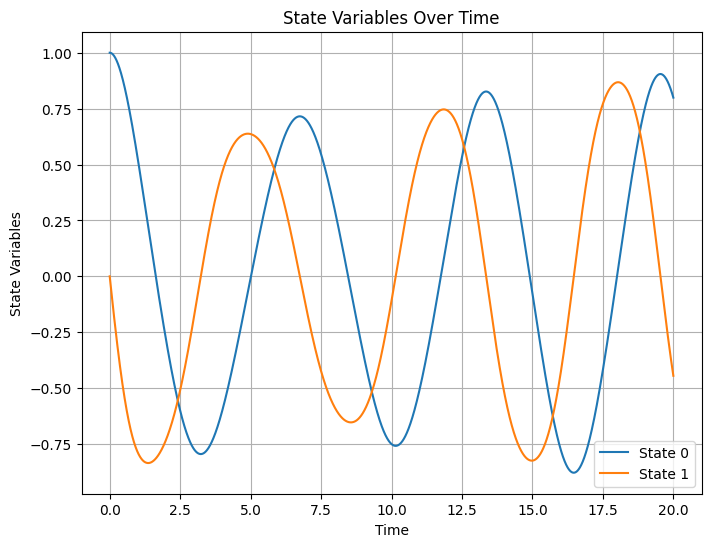

Pickle file saved at: pickle_files/Duffing_Oscillator_Set-1_Deg-Poly_3_0_Params-0.2_1.0_0.5_0.3_1.0_IC-1.0_0.0.pkl

Simulating Duffing_Oscillator (Set 2)
Parameters: [0.2, 1.0, 0.5, 0.8, 1.0]
Initial conditions: [0.5, 0.0]
Expected behavior: chaotic


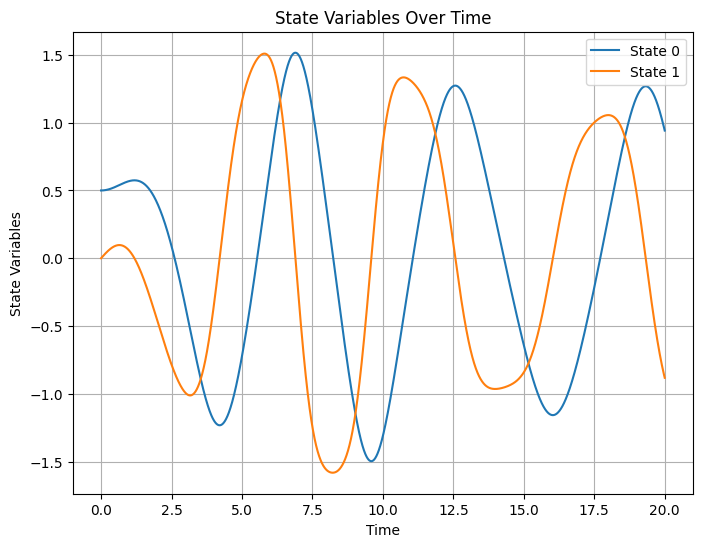

Pickle file saved at: pickle_files/Duffing_Oscillator_Set-2_Deg-Poly_3_0_Params-0.2_1.0_0.5_0.8_1.0_IC-0.5_0.0.pkl

Simulating Quartic_Oscillator (Set 1)
Parameters: [1.0, 0.5]
Initial conditions: [1.0, 0.0]
Expected behavior: cyclic


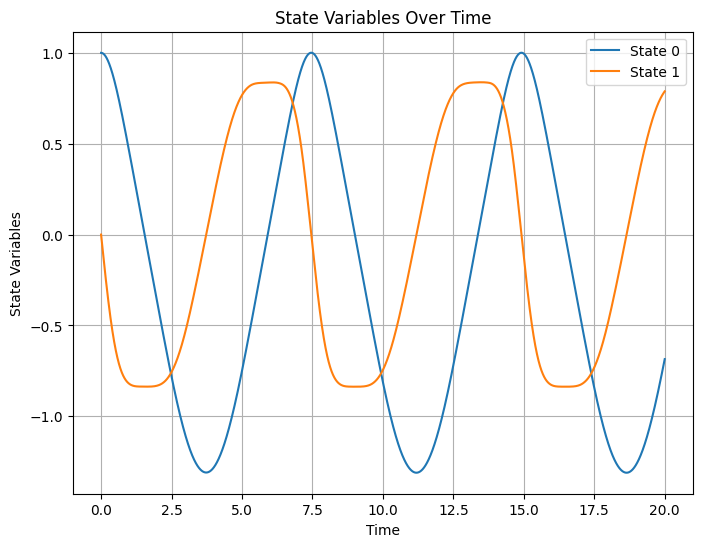

Pickle file saved at: pickle_files/Quartic_Oscillator_Set-1_Deg-Poly_4_0_Params-1.0_0.5_IC-1.0_0.0.pkl

Simulating Quartic_Oscillator (Set 2)
Parameters: [1.0, 1.0]
Initial conditions: [0.5, 0.0]
Expected behavior: complex


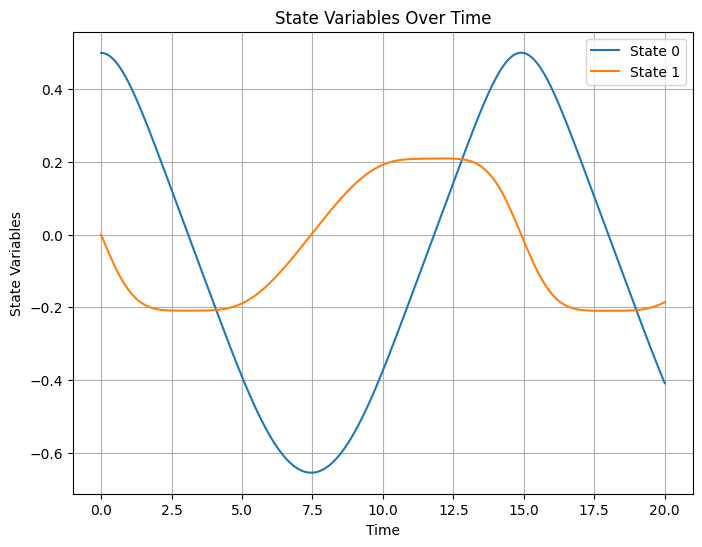

Pickle file saved at: pickle_files/Quartic_Oscillator_Set-2_Deg-Poly_4_0_Params-1.0_1.0_IC-0.5_0.0.pkl

Simulating Lotka_Volterra_Cubic (Set 1)
Parameters: [1.0, 0.5, 0.1, 1.0, 0.1]
Initial conditions: [0.5, 1.0]
Expected behavior: cyclic


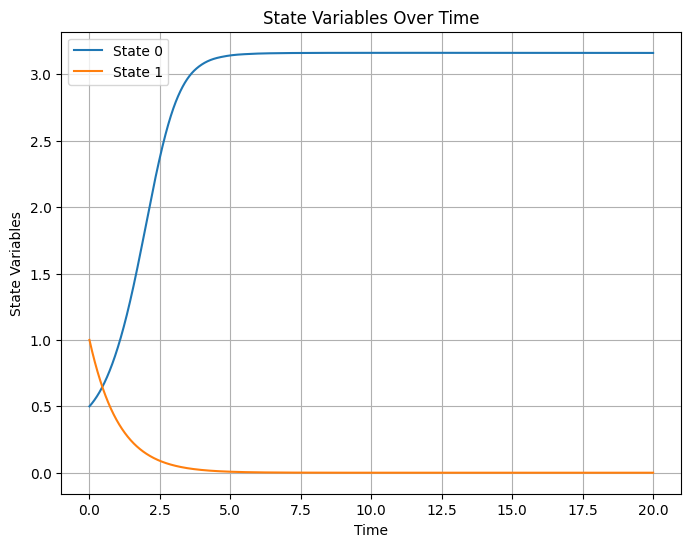

Pickle file saved at: pickle_files/Lotka_Volterra_Cubic_Set-1_Deg-Poly_3_0_Params-1.0_0.5_0.1_1.0_0.1_IC-0.5_1.0.pkl

Simulating Lotka_Volterra_Cubic (Set 2)
Parameters: [1.0, 0.5, 0.3, 1.0, 0.2]
Initial conditions: [0.7, 0.5]
Expected behavior: complex


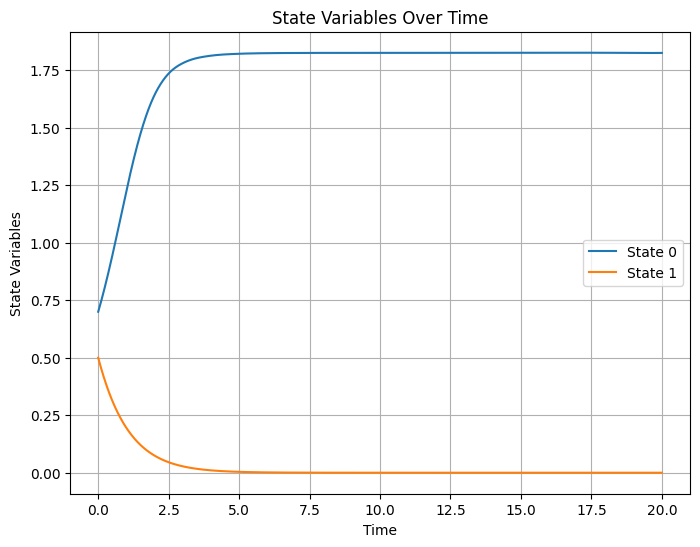

Pickle file saved at: pickle_files/Lotka_Volterra_Cubic_Set-2_Deg-Poly_3_0_Params-1.0_0.5_0.3_1.0_0.2_IC-0.7_0.5.pkl


In [ ]:
# Example of how to access the rhs function and parameters_and_IC for the Lorenz system
#system_name = 'Damped_Oscilllator'
#system_name = 'Lorenz'                             #DCF=('Poly', 2, 0)
#system_name = 'Van_der_Pol'                        #DCF=('Poly', 3, 0)
#system_name = 'Lorenz96'                           #DCF=('Poly', 2, 0)
#system_name = 'Rossler'                            #DCF=('Poly', 2, 0)
#system_name = 'Linear_1D'                          #DCF=('Poly', 1, 0)
#system_name = 'Linear_2D_Harmonic_Oscillator'      #DCF=('Poly', 1, 0)
#system_name = 'Linear_3D_Coupled_Oscillators'      #DCF=('Poly', 1, 0)
#system_name = 'Linear_4D_Coupled_Oscillators'      #DCF=('Poly', 1, 0)
#system_name = 'Linear_5D_Coupled_Oscillators'      #DCF=('Poly', 1, 0)
#system_name = 'Duffing_Oscillator'                 #DCF=('Poly', 3, 0)
#system_name = 'Quartic_Oscillator'                 #DCF=('Poly', 4, 0)
#system_name = 'Lotka_Volterra_Cubic'               #DCF=('Poly', 3, 0)
import os
import pickle
import glob

# Counter for the number of samples generated
sample_count = 0

# **LOOP OVER ALL SYSTEMS AND PARAMETER SETS**
for system_name, system_data in ode_systems.items():
    rhs_func = system_data['rhs_function']
    parameters_and_IC = system_data['parameters_and_IC']
    degree = system_data['DCF_values']
#rhs_func = ode_systems[system_name]['rhs_function']
#parameters_and_IC = ode_systems[system_name]['parameters_and_IC']

# Accessing a specific pair of parameters and initial conditions for the selected system
#param_IC_index = 0



#params = parameters_and_IC[param_IC_index][0]  # Parameter values
#initial_conditions = parameters_and_IC[param_IC_index][1]  # Initial conditions
#description = parameters_and_IC[param_IC_index][2]  # Behavior description

#print(f"Simulating {system_name} system with parameters: {params}")
#print(f"Initial conditions: {initial_conditions}")
#print(f"Expected behavior: {description}")



    for idx, (params, initial_conditions, description) in enumerate(parameters_and_IC):
        print(f"\nSimulating {system_name} (Set {idx + 1})")
        print(f"Parameters: {params}")
        print(f"Initial conditions: {initial_conditions}")
        print(f"Expected behavior: {description}")


         # Solve the system
        t_span = (0, 20)
        t_eval = np.linspace(t_span[0], t_span[1], 10000)
        sol = simulate_ode_system(rhs_func, t_span, initial_conditions, params, solver='RK45', t_eval=t_eval)

        # Plot results
        #plot_phase_space(sol)
        plot_trajectories(sol)

# Simulating the Lorenz system with first set of parameters and initial conditions
#t_span = (0, 20)
#t_eval = np.linspace(t_span[0], t_span[1], 10000)

#sol = simulate_ode_system(rhs_func, t_span, initial_conditions, params, solver='RK45', t_eval=t_eval)

# Plot phase space and trajectories
#plot_phase_space(sol)
#plot_trajectories(sol)



        # Save as pickle file
        time_series_sample = {
            "Time series": sol,
            "degree": degree
        }


        # Define the folder name for pickle file (generated sample)
        folder_name = "pickle_files"
        # Create the folder if it doesn't exist
        if not os.path.exists(folder_name):
            os.makedirs(folder_name)

        # Convert lists to strings for filenames
        degree_str = "_".join(map(str, degree))
        params_str = "_".join(map(str, params))
        ic_str = "_".join(map(str, initial_conditions))

        # Store the relevant details in the file name
        file_name = os.path.join(folder_name, f"{system_name}_Set-{idx + 1}_Deg-{degree_str}_Params-{params_str}_IC-{ic_str}.pkl")
 # Save the pickle file in the folder
        with open(file_name, "wb") as f:
            pickle.dump(time_series_sample, f)

        print(f"Pickle file saved at: {file_name}")

        # Increment sample counter
        sample_count += 1



# List all saved pickle files
#pickle_files = glob.glob(f"{folder_name}/*.pkl")
#print("\nAll saved pickle files:")
#print("\n".join(pickle_files))

#List All Pickle Files in the Folder

import glob

# Get all .pkl files inside the folder
pickle_files = glob.glob(f"{folder_name}/*.pkl")







In [ ]:
# Print file names
print("Saved pickle files:")
for file in pickle_files:
    print(file)
# Print total count of generated samples
print(f"\nTotal number of samples generated and saved: {sample_count}")

Saved pickle files:
pickle_files/Lorenz_Set-3_Deg-Poly_2_0_Params-10.0_100.0_2.6666666666666665_IC-2.0_2.0_2.0.pkl
pickle_files/Lorenz_Set-2_Deg-Poly_2_0_Params-10.0_15.0_2.6666666666666665_IC-0.5_0.5_0.5.pkl
pickle_files/Linear_3D_Coupled_Oscillators_Set-2_Deg-Poly_1_0_Params-0.5_0.5_0.5_IC-1.0_1.0_1.0.pkl
pickle_files/Linear_4D_Coupled_Oscillators_Set-1_Deg-Poly_1_0_Params-1.0_1.0_1.0_1.0_IC-1.0_0.0_0.0_0.0.pkl
pickle_files/Rossler_Set-2_Deg-Poly_2_0_Params-0.1_0.1_6.0_IC-0.5_0.5_0.5.pkl
pickle_files/Quartic_Oscillator_Set-2_Deg-Poly_4_0_Params-1.0_1.0_IC-0.5_0.0.pkl
pickle_files/Duffing_Oscillator_Set-2_Deg-Poly_3_0_Params-0.2_1.0_0.5_0.8_1.0_IC-0.5_0.0.pkl
pickle_files/Linear_5D_Coupled_Oscillators_Set-1_Deg-Poly_1_0_Params-1.0_1.0_1.0_1.0_1.0_IC-1.0_0.0_0.0_0.0_0.0.pkl
pickle_files/Damped_Oscilllator_Set-1_Deg-Poly_1_0_Params-1.0_0.5_IC-4.0_3.0.pkl
pickle_files/Damped_Oscilllator_Set-3_Deg-Poly_1_0_Params-1.0_2.0_IC-5.0_8.0.pkl
pickle_files/Damped_Oscilllator_Set-2_Deg-Poly_1_0_Pa

In [ ]:
sol

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  2.000e-03 ...  2.000e+01  2.000e+01]
        y: [[ 7.000e-01  7.008e-01 ...  1.825e+00  1.825e+00]
            [ 5.000e-01  4.991e-01 ...  2.186e-07  2.181e-07]]
      sol: None
 t_events: None
 y_events: None
     nfev: 104
     njev: 0
      nlu: 0

In [ ]:
#import pickle


#time series data with degree labels(dictionary format)
#degree=ode_systems[system_name]['DCF_values']
#time_series_sample = {
#    "Time series":sol,
#    "degree":degree
#}

#print("Time series with labels saved!")
#time_series_sample




In [ ]:
#import os

# Define the folder name for pickle file (generated sample)
#folder_name = "pickle_files"

# Create the folder if it doesn't exist
#if not os.path.exists(folder_name):
#    os.makedirs(folder_name)

In [ ]:
#import pickle



# Convert lists to strings
#degree_str = "_".join(map(str, degree))
#params_str = "_".join(map(str, params))
#ic_str = "_".join(map(str, initial_conditions))

#store the relevant details in the file name
#file_name = os.path.join(folder_name, f"{system_name}_Deg-{degree_str}_Params-{params_str}_IC-{ic_str}.pkl")



#file_name = f"{folder_name}/{system_name}_{degree_str}_{parameters_str}.pkl"



# Save the pickle file in the folder
#with open(file_name, "wb") as f:
#    pickle.dump(time_series_sample, f)

#print(f"Pickle file saved at: {file_name}")





In [ ]:
#List All Pickle Files in the Folder

#import glob

# Get all .pkl files inside the folder
#pickle_files = glob.glob(f"{folder_name}/*.pkl")

# Print file names
#print("Saved pickle files:", pickle_files)



In [ ]:
#Run this To download the entire folder as a ZIP file:

#import shutil
#shutil.make_archive('ode_simulations', 'zip', folder_name)
#from google.colab import files
#files.download(f"{'ode_simulations'}.zip")


In [ ]:
# Load the time series from pickle
with open(file_name, "rb") as f:
    loaded_data = pickle.load(f)

print("Loaded Time Series:", loaded_data)

Loaded Time Series: {'Time series':   message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  2.000e-03 ...  2.000e+01  2.000e+01]
        y: [[ 7.000e-01  7.008e-01 ...  1.825e+00  1.825e+00]
            [ 5.000e-01  4.991e-01 ...  2.186e-07  2.181e-07]]
      sol: None
 t_events: None
 y_events: None
     nfev: 104
     njev: 0
      nlu: 0, 'degree': ['Poly', 3, 0]}
